In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df_titanic = pd.read_csv('train.csv') 


  it starts to count from last passenger and takes last 6 passengers. 

In [5]:
df_titanic[-6:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [6]:
df_titanic.columns
## output is a list of titles

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

this table stores 891 people

In [7]:
print(df_titanic.shape)

(891, 12)


In [8]:
df_titanic.isnull().sum()
## age column has 177 NaN values 
## cabin column has 687 NaN values 
## embarked column has 2 NaN values 
## others doesn't have any NaN values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

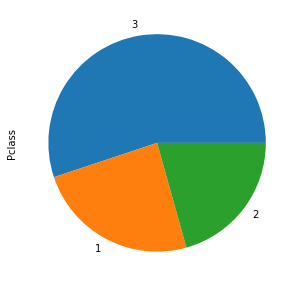

In [9]:
plot = df_titanic["Pclass"].value_counts().plot.pie(figsize=(5, 5))
## 3th class has the most passengers 

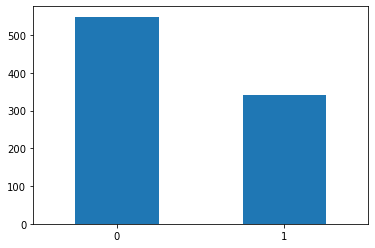

In [10]:
plot=df_titanic["Survived"].value_counts().plot.bar(rot=0)
## it shows that most of the people are died 
## 0= dead people 1 = survived 

<AxesSubplot:ylabel='Survived'>

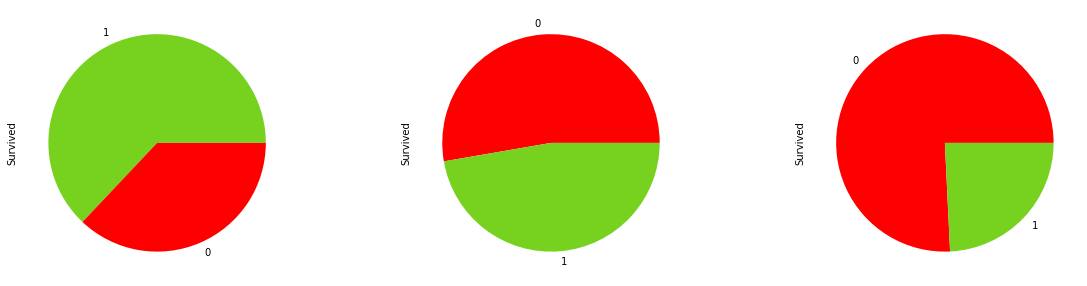

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df_titanic["Survived"].loc[df_titanic["Pclass"]==1].value_counts().plot.pie(colors=["#77D220","red"])
## people mostly survived

plt.subplot(1,3,2)
df_titanic["Survived"].loc[df_titanic["Pclass"]==2].value_counts().plot.pie(colors=["red","#77D220"])
## people mostly died

plt.subplot(1,3,3)
df_titanic["Survived"].loc[df_titanic["Pclass"]==3].value_counts().plot.pie(colors=["red","#77D220"])
## mostly people died 

<AxesSubplot:>

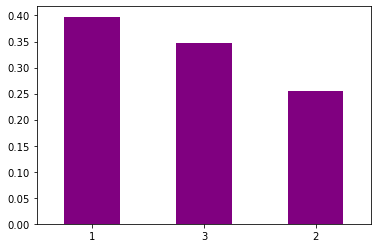

In [12]:
df_titanic["Pclass"].loc[df_titanic["Pclass"].all() & df_titanic["Survived"]==1].value_counts(normalize=True).plot.bar(color="purple",rot=0)
## it shows that 1th class people were more lucky 
## first class has the highest survival rate maybe because the place they stay on titanic was more favorable for them


In [13]:
pd.crosstab(df_titanic.Sex,df_titanic.Survived,margins=True)
## this is the cross table 0:not survived 1: survived 
## most number of survivors are females
## as ı can see mostly men couldnt survived. I guess people tried to save women first 

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<AxesSubplot:xlabel='Embarked,Survived'>

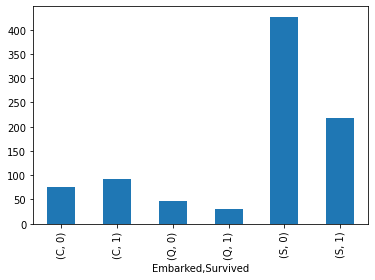

In [14]:
df_titanic["Embarked"].groupby([df_titanic["Embarked"],df_titanic["Survived"]]).count().plot.bar()
## people who is embarked=s are mostly couldnt survived and most of the people are embarked = 0 

In [15]:
Age_group=[]
for x in df_titanic["Age"]:
    if (19 > x):
        Age_group.append("Child")
    elif x < 60:
        Age_group.append("Adult")
    else :
        Age_group.append("Old")
        
pd.crosstab([df_titanic.Sex,df_titanic.Survived],[Age_group],margins=True)
## as ı can see females are mostly survived and males are mostly died
## ı think the reason of it is people give females more priority to save than males

col_0            Adult  Child  Old  All
Sex    Survived                        
female 0            42     22   17   81
       1           147     46   40  233
male   0           294     47  127  468
       1            66     24   19  109
All                549    139  203  891

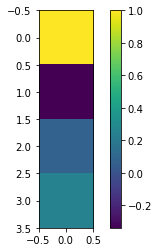

In [16]:
df_corr = df_titanic[["Survived", "Pclass", "Parch", "Fare"]].corr()
plt.imshow(pd.DataFrame(df_corr["Survived"]))
plt.colorbar()

In [17]:
name_titles=[]

for x in df_titanic["Name"]:
    d=x.split()
    for y in d:
        if y[-1:]==".":
            name_titles.append(y)

                
pd.DataFrame(pd.DataFrame(name_titles).value_counts()).size         
   



18

In [18]:
name_titles=[]

for x in df_titanic["Name"]:
    d=x.split()
    for y in d:
        if y[-1:]==".":
            name_titles.append(y)

                
pd.DataFrame(pd.DataFrame(name_titles).value_counts())

,0
0,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Mlle.,2
Major.,2
Col.,2


In [19]:
toplamyolcu=df_titanic["PassengerId"].count()-df_titanic["PassengerId"].loc[df_titanic["Age"].isna()].count()
df_titanic["Age"].sum()/toplamyolcu
##ortalama hesaplıyor

29.69911764705882

<AxesSubplot:xlabel='Survived', ylabel='Age'>

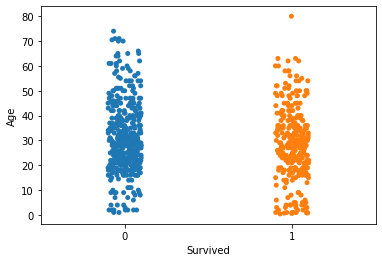

In [20]:
## people who is between 20-40 are mostly couldnt survived
ax = sns.stripplot(x="Survived", y="Age", data=df_titanic)

ax

In [21]:
df_titanic["Age"].max()

80.0

<AxesSubplot:ylabel='None'>

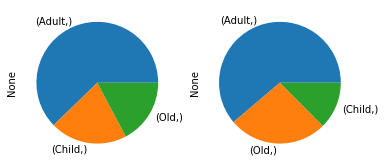

In [22]:

a=df_titanic["Age"].loc[df_titanic["Survived"]==1].value_counts(normalize=True)
plt.subplot(1,2,1)
Age_group=[]
for x in df_titanic["Age"].loc[df_titanic["Survived"]==1]:
    if (19 > x):
        Age_group.append("Child")
    elif x < 60:
        Age_group.append("Adult")
    else :
        Age_group.append("Old")
b=pd.DataFrame(Age_group)

b.value_counts(normalize=1).plot.pie()

plt.subplot(1,2,2)
Age_group=[]
for x in df_titanic["Age"].loc[df_titanic["Survived"]==0]:
    if (19 > x):
        Age_group.append("Child")
    elif x < 60:
        Age_group.append("Adult")
    else :
        Age_group.append("Old")
b=pd.DataFrame(Age_group)

b.value_counts(normalize=1).plot.pie()
## more  percentages of children survived than percentages of old people

In [23]:
print(df_titanic["SibSp"].max())

8


## ---------------------